<a href="https://colab.research.google.com/github/hellojoelhuber/msu-cse-8673-machine-learning/blob/import-code-from-colab/Group_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

Please follow these instructions to understand how to use this colab effectively.

## This means YOU!

Each section is organized by installs and imports, definitions, and then execution.

Start with Approach 2: Hierarchal Graph.

Run each code block in order: Import libraries, visualization functions, metadata calculation functions, data generation functions, then execution.

You may modify values in the execution block before running them, e.g., graph depth.

Most execution steps will run in a few seconds, depending on the number of loops you input. For example, the Hierarchal Graph execution will generate the number of graphs equal to the number you enter in the for-loop range.

## Where the Data is Stored

Data is stored in Google Drive. You should be able to see the files in Colab, or you may have viewer access at this link: https://drive.google.com/drive/folders/1-DijjYVPOJIFmlTUKeAq7owwnUfRb2K7?usp=sharing. We are not colab/Google Drive experts, so we _think_ that you will have to create your own directories in your own Google Drive to successfully run the code to generate graphs data and ML on it.

If you want to generate novel data, be sure to create a new folder to hold that data and set the execution step to correctly generate the expected data and place it in the expected output location.

## Install Dependencies

The "install dependencies" step in "Machine Learning - Graph" will take 40 or more minutes.

In our experience, you MUST install dependencies every time. As such, you may wish to run that code block first before running any other code blocks.

## IF YOU ENCOUNTER ERRORS

As of this writing (2023/11/20), running every code block in order results in the expected outputs and no errors. If you run into errors, try the following troubleshooting steps:

* You may not have a dependency installed. Run the dependency code blocks.
* You may not have run an import or definition code block. Run the import and function definition code blocks.
* You may have run code blocks out of order. Run each code block in order.
* You may not be connected to Google Drive. (Connect in Approach 2, Execution)
* You may not have the directory created inside your Google Drive. Create the directory to proceed.
* You may not have generated graphs data set (repeat Approach 2 section) and/or have a typo in your file path (check your file path for correctness).


# Attempt 1: Generating graphs

It is commented out here to indicate that we aren't using this approach; preserving for posterity.

The following code generates 1 graph and its visualization.



In [ ]:
# # Integrating the network generation function with the propagation algorithm.
# # First, we need to modify the propagation algorithm to work with the network generated by the provided code.

# import numpy as np
# import random
# import heapq
# import networkx as nx
# import matplotlib.pyplot as plt

# def generate_dag(num_nodes, max_in_edges=2, max_out_edges=2):
#     G = nx.DiGraph()

#     # Add nodes with 'Acc' values
#     for i in range(num_nodes):
#         acc_value = random.uniform(0.7, 1.0)  # Random accuracy between 70% and 100%
#         G.add_node(i, accuracy=acc_value)

#     nodes = list(G.nodes)
#     source_node = nodes[0]

#     for node in nodes[1:]:  # Skip the source node
#         potential_predecessors = [n for n in nodes if n < node and len(G.out_edges(n)) < max_out_edges]
#         if not potential_predecessors:
#             continue

#         existing_in_edges = len(G.in_edges(node))
#         if existing_in_edges >= max_in_edges:
#             continue

#         num_edges_left = max_in_edges - existing_in_edges
#         num_in_edges = random.randint(1, min(num_edges_left, len(potential_predecessors)))

#         for _ in range(num_in_edges):
#             chosen_predecessor = random.choice(potential_predecessors)
#             G.add_edge(chosen_predecessor, node, frequency=random.randint(1, 10), trust=random.uniform(0.7, 1.0))
#             potential_predecessors.remove(chosen_predecessor)

#         potential_successors = [n for n in nodes if n > node and len(G.in_edges(n)) < max_in_edges]
#         if not potential_successors:
#             continue

#         existing_out_edges = len(G.out_edges(node))
#         if existing_out_edges >= max_out_edges:
#             continue

#         num_edges_left = max_out_edges - existing_out_edges
#         num_out_edges = random.randint(1, min(num_edges_left, len(potential_successors)))

#         for _ in range(num_out_edges):
#             chosen_successor = random.choice(potential_successors)
#             G.add_edge(node, chosen_successor, frequency=random.randint(1, 10), trust=random.uniform(0.7, 1.0))
#             potential_successors.remove(chosen_successor)

#     return G

# def propagate_information_with_frequency(network, source, accuracy_dict, trust_dict, frequency_dict):
#     info_state = {node: (0, float('inf')) for node in network.nodes()}
#     info_state[source] = (1, 0)

#     queue = [(0, source)]

#     while queue:
#         current_time, current_node = heapq.heappop(queue)

#         for neighbor in network.neighbors(current_node):
#             edge = (current_node, neighbor)
#             propagation_time = current_time + frequency_dict.get(edge, float('inf'))

#             propagated_accuracy = info_state[current_node][0] * accuracy_dict[current_node] * trust_dict.get(edge, 0)

#             if propagated_accuracy > info_state[neighbor][0] or propagation_time < info_state[neighbor][1]:
#                 info_state[neighbor] = (max(propagated_accuracy, info_state[neighbor][0]), propagation_time)
#                 heapq.heappush(queue, (propagation_time, neighbor))

#     return info_state



# # Generate the network
# # generate_dag(num_nodes, max_in_edges=2, max_out_edges=2)
# network = generate_dag(10, 2, 2)

# # Extract attributes into dictionaries
# accuracy_dict = nx.get_node_attributes(network, 'accuracy')
# trust_dict = nx.get_edge_attributes(network, 'trust')
# frequency_dict = nx.get_edge_attributes(network, 'frequency')


# # Run the propagation algorithm
# results = propagate_information_with_frequency(network, 0, accuracy_dict, trust_dict, frequency_dict)

# # Visualize the network with the propagation results
# visualize_networks_side_by_side(network, results)



# Approach 2: Hierarchal Graph

## Install Dependencies

This install took 20 seconds.

In [6]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 15 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jamm

## Import libraries

In [4]:
import numpy as np
import random
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz  # This is required for using graphviz_layout

## Visualization Functions

In [50]:
def visualize_networks_side_by_side(G, info_state):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

    # Tree layout for positioning the nodes
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

    # Draw the original graph with node and edge properties
    plt.sca(axes[0])
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_size=10, arrowsize=15)

    node_labels_acc = nx.get_node_attributes(G, 'accuracy')
    edge_labels_freq = nx.get_edge_attributes(G, 'frequency')
    edge_labels_trust = nx.get_edge_attributes(G, 'trust')
    combined_edge_labels = {(e[0], e[1]): f"F: {edge_labels_freq[e]}, T: {edge_labels_trust[e]:.2f}" for e in G.edges()}

    # Draw node accuracy labels
    for node, accuracy in node_labels_acc.items():
        label = f"Acc: {accuracy:.2f}"
        plt.text(pos[node][0], pos[node][1]+0.1, label, horizontalalignment='center', fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

    nx.draw_networkx_edge_labels(G, pos, edge_labels=combined_edge_labels, font_size=6)
    axes[0].set_title("Original DAG")

    # Draw the graph with propagation results
    plt.sca(axes[1])
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_size=10, arrowsize=15)
    for node, (accuracy, time) in info_state.items():
        time_text = f"inf" if time == float('inf') else f"{time:.2f}"
        label = f"Info: {accuracy:.2f}\nTime: {time_text}"
        plt.text(pos[node][0], pos[node][1]-0.1, label, horizontalalignment='center', fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    axes[1].set_title("DAG with Propagation Results")

    plt.tight_layout()
    plt.show()


def output_png(G, output_filename="network_visualization.png"):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

    # Original graph
    plt.sca(axes)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_size=10, arrowsize=15)

    node_labels_acc = nx.get_node_attributes(G, 'accuracy')
    edge_labels_freq = nx.get_edge_attributes(G, 'frequency')
    edge_labels_trust = nx.get_edge_attributes(G, 'trust')
    combined_edge_labels = {(e[0], e[1]): f"F: {edge_labels_freq[e]}, T: {edge_labels_trust[e]:.2f}" for e in G.edges()}

    # Draw node accuracy labels
    for node, accuracy in node_labels_acc.items():
        label = f"Acc: {accuracy:.2f}"
        plt.text(pos[node][0], pos[node][1]+0.1, label, horizontalalignment='center', fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

    nx.draw_networkx_edge_labels(G, pos, edge_labels=combined_edge_labels, font_size=6)
    axes.set_title("Original DAG")

    # Draw the graph with propagation results
    # plt.sca(axes[1])
    # nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_size=10, arrowsize=15)
    # for node, (accuracy, time) in info_state.items():
    #     time_text = f"inf" if time == float('inf') else f"{time:.2f}"
    #     label = f"Info: {accuracy:.2f}\nTime: {time_text}"
    #     plt.text(pos[node][0], pos[node][1]-0.1, label, horizontalalignment='center', fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    # axes[1].set_title("DAG with Propagation Results")

    # plt.tight_layout()
    # plt.show()


    plt.tight_layout()

    # Save to PNG file
    plt.savefig(output_filename)
    # plt.show()

def convert_graphml_to_png(graphml_file, output_filename="network_visualization.png"):
    G = nx.read_graphml(graphml_file)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

    # Original graph
    plt.sca(axes)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_size=10, arrowsize=15)

    node_labels_acc = nx.get_node_attributes(G, 'accuracy')
    edge_labels_freq = nx.get_edge_attributes(G, 'frequency')
    edge_labels_trust = nx.get_edge_attributes(G, 'trust')
    combined_edge_labels = {(e[0], e[1]): f"F: {edge_labels_freq[e]}, T: {edge_labels_trust[e]:.2f}" for e in G.edges()}

    # Draw node accuracy labels
    for node, accuracy in node_labels_acc.items():
        label = f"Acc: {accuracy:.2f}"
        plt.text(pos[node][0], pos[node][1]+0.1, label, horizontalalignment='center', fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

    nx.draw_networkx_edge_labels(G, pos, edge_labels=combined_edge_labels, font_size=6)
    axes.set_title("Original DAG")

    # Draw the graph with propagation results
    # plt.sca(axes[1])
    # nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_size=10, arrowsize=15)
    # for node, (accuracy, time) in info_state.items():
    #     time_text = f"inf" if time == float('inf') else f"{time:.2f}"
    #     label = f"Info: {accuracy:.2f}\nTime: {time_text}"
    #     plt.text(pos[node][0], pos[node][1]-0.1, label, horizontalalignment='center', fontsize=8, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    # axes[1].set_title("DAG with Propagation Results")

    # plt.tight_layout()
    # plt.show()


    plt.tight_layout()

    # Save to PNG file
    plt.savefig(output_filename)
    plt.show()

# Call the visualization function
# graph_load_file_path = '/content/drive/MyDrive/GraphDataSet/DepthFourGraphs/my_graph_100.graphml'
# graph_save_file_path = '/content/drive/MyDrive/GraphDataSet/DepthFourGraphs/my_graph_100.png'

# convert_graphml_to_png(graph_load_file_path, graph_save_file_path)


## Metadata Calculation Functions

In [6]:

def calculate_depth(graph, root_node):
    # Make sure the graph is a directed acyclic graph
    if not nx.is_directed_acyclic_graph(graph):
        raise ValueError("Graph is not a directed acyclic graph (DAG)")

    # Perform DFS and track the maximum depth
    max_depth = 0
    stack = [(root_node, 0)]  # Each element is a tuple (node, depth)

    while stack:
        current_node, current_depth = stack.pop()
        max_depth = max(max_depth, current_depth)

        # Add neighbors to stack
        for neighbor in graph.neighbors(current_node):
            stack.append((neighbor, current_depth + 1))

    return max_depth


def calculate_mean_median_propagated_accuracy(info_state):
    # Extract the propagated_accuracy values from info_state
    propagated_accuracies = [accuracy for accuracy, _ in info_state.values()]

    # Calculate mean and median
    mean_accuracy = np.mean(propagated_accuracies)
    median_accuracy = np.median(propagated_accuracies)

    return mean_accuracy, median_accuracy

def calculate_mean_trust_reliability(G):
    # Calculate average reliability
    total_reliability = sum(nx.get_node_attributes(G, 'reliability').values())
    average_reliability = total_reliability / G.number_of_nodes()

    # Calculate average trust
    total_trust = sum([data['trust'] for _, _, data in G.edges(data=True)])
    average_trust = total_trust / G.number_of_edges()

    return average_trust, average_reliability



## Data Generation Functions

In [56]:
def generate_hierarchical_graph(num_levels, accuracy_range=(0.7, 1.0), frequency_range=(1, 10), trust_range=(0.7, 1.0)):
    G = nx.DiGraph()
    node_id = 0  # Start with the root node

    # Add the root node with level and branch attributes
    G.add_node(node_id, accuracy=random.uniform(*accuracy_range), level=0, branch=0)
    node_id += 1

    # Generate nodes level by level
    for level in range(1, num_levels):  # Start from level 1 as root is already added
        parent_nodes = [n for n in G.nodes() if G.nodes[n]['level'] == level - 1]  # Parent nodes at the previous level
        branch_id = 0  # Branch id starts at 0 for each level
        for parent_node in parent_nodes:
##### Fixing the branching factor to always give 2 branches from root
            # branching_factor = random.randint(1, 2)
            branching_factor = 2 if level == 1 else random.randint(1, 2)
##### END Fixing
            for _ in range(branching_factor):
                # Add child node and connect to the parent with level and branch attributes
                G.add_node(node_id, accuracy=random.uniform(*accuracy_range), level=level, branch=branch_id)
                frequency = random.randint(*frequency_range)
                trust = random.uniform(*trust_range)
                G.add_edge(parent_node, node_id, frequency=frequency, trust=trust)
                node_id += 1
            branch_id += 1  # Increment branch id for the next set of children

    return G

# def propagate_information_with_frequency(network, source, accuracy_dict, trust_dict, frequency_dict):
#     info_state = {node: (0, float('inf')) for node in network.nodes()}
#     info_state[source] = (1, 0)

#     queue = [(0, source)]

#     while queue:
#         current_time, current_node = heapq.heappop(queue)

#         for neighbor in network.neighbors(current_node):
#             edge = (current_node, neighbor)
#             propagation_time = current_time + frequency_dict.get(edge, float('inf'))

#             propagated_accuracy = info_state[current_node][0] * accuracy_dict[current_node] * trust_dict.get(edge, 0)

#             if propagated_accuracy > info_state[neighbor][0] or propagation_time < info_state[neighbor][1]:
#                 info_state[neighbor] = (max(propagated_accuracy, info_state[neighbor][0]), propagation_time)
#                 heapq.heappush(queue, (propagation_time, neighbor))

#     return info_state
####
# The above code is potentially not sharing information if the propagation time is > the neighbor's.
# When this happens, the two graphs are identical averages.
# The process we should follow is that the source node considers its lowest propagation time,
# then the child node adds its edges to consideration, and we pick the lowest of remaining-parent-edge and child-edges
# then we add the new node's edges' propagation times to the mix and pick the lowest again.
# Repeat until all edges have been propagated.
#
# Also, we don't want the MAX of prop_acc and info_state[to_node][0], we want the average result if info_state[to_node][0] > 0.

def propagate_information_with_frequency(network, source, accuracy_dict, trust_dict, frequency_dict):
    info_state = {node: (0, float('inf')) for node in network.nodes()}
    info_state[source] = (1, 0)

    # Initialize an array of edges starting from the source, sorted by propagation time
    edges = [(frequency_dict.get((source, neighbor), float('inf')), source, neighbor) for neighbor in network.neighbors(source)]
    heapq.heapify(edges)  # Convert the list into a heap

    while edges:
        current_time, from_node, to_node = heapq.heappop(edges)  # Get the edge with the lowest propagation time

        propagated_accuracy = info_state[from_node][0] * accuracy_dict[from_node] * trust_dict.get((from_node, to_node), 0)

        # Update the info state of the to_node if necessary
        if info_state[to_node][0] == 0:
            new_accuracy = propagated_accuracy
        else:
            new_accuracy = (info_state[to_node][0] + propagated_accuracy) / 2.0

        info_state[to_node] = (new_accuracy, current_time)

        # Add edges from the to_node to the array, then re-sort
        for neighbor in network.neighbors(to_node):
            edge_time = current_time + frequency_dict.get((to_node, neighbor), float('inf'))
            heapq.heappush(edges, (edge_time, to_node, neighbor))

    return info_state
####
####
#### END ADJUSTMENT TO LOGIC

def add_random_edges(G, num_edges_range, source_node, accuracy_range=(0.7, 1.0), frequency_range=(1, 10), trust_range=(0.7, 1.0)):
    # Create a copy of the graph to avoid modifying the original
    G_copy = G.copy()

    num_edges_to_add = random.randint(*num_edges_range)
    all_nodes = list(G_copy.nodes())
    all_nodes.remove(source_node)

    for _ in range(num_edges_to_add):
        from_node = random.choice(all_nodes)
        to_node = random.choice(all_nodes)

        while to_node == from_node or G_copy.has_edge(from_node, to_node) or G_copy.has_edge(to_node, from_node):
            to_node = random.choice(all_nodes)

        frequency = random.randint(*frequency_range)
        trust = random.uniform(*trust_range)
        G_copy.add_edge(from_node, to_node, frequency=frequency, trust=trust)

        # Ensure new nodes have accuracy attribute
        if 'accuracy' not in G_copy.nodes[from_node]:
            G_copy.nodes[from_node]['accuracy'] = random.uniform(*accuracy_range)
        if 'accuracy' not in G_copy.nodes[to_node]:
            G_copy.nodes[to_node]['accuracy'] = random.uniform(*accuracy_range)

    return G_copy

## Alternative to adding random edges:

def add_cross_branch_edge(G):
    """
    Adds one new edge from a randomly selected lower level to a higher level on a different branch of a binary tree.
    The function automatically determines valid levels and ensures the connection is between different branches.
    The root level (level 0) is excluded from being a source node.

    :param G: The binary tree graph (DiGraph)
    :return: The modified graph with the added edge
    """
    # Create a copy of the graph
    G_copy = G.copy()

    # Get the maximum level in the tree
    max_level = max(data.get('level', 0) for _, data in G_copy.nodes(data=True))

    if max_level < 2:  # Need at least 2 levels apart from the root to add an edge
        raise ValueError("The tree must have more than one level apart from the root")

    # Randomly select levels for the new edge
    lower_level = random.randint(1, max_level - 1)  # Exclude level 0 and ensure a higher level exists
    higher_level = random.randint(lower_level + 1, max_level)  # Ensure higher level is greater than lower level

    # Get nodes at the specified levels
    lower_level_nodes = [node for node, data in G_copy.nodes(data=True) if data.get('level') == lower_level]
    higher_level_nodes = [node for node, data in G_copy.nodes(data=True) if data.get('level') == higher_level]

    # # Randomly select from_node and to_node, ensuring they are on different branches
    # from_node = random.choice(lower_level_nodes)
    # to_node = random.choice(higher_level_nodes)
    # while G_copy.nodes[to_node]['branch'] == G_copy.nodes[from_node]['branch']:
    #     to_node = random.choice(higher_level_nodes)

    # # Add the new edge with random attributes
    # frequency = random.randint(1, 10)
    # trust = random.uniform(0.7, 1.0)
    # G_copy.add_edge(from_node, to_node, frequency=frequency, trust=trust)

#### Updating the from_ and to_ selections so that if there is no valid edge,
#### we pick different to_ or from_ nodes. In a depth 4 tree, we should always
#### have at least 1 valid edge to add.

    # Shuffle the lower_level_nodes to pick a random one; the "first" in the
    # randomized result will be our choice.
    random.shuffle(lower_level_nodes)

    # Iterate over randomized lower_level_nodes to find a valid from_node
    for from_node in lower_level_nodes:
        valid_to_nodes = [node for node in higher_level_nodes if not G_copy.has_edge(from_node, node) and G_copy.nodes[node]['branch'] != G_copy.nodes[from_node]['branch']]

        if valid_to_nodes:
            to_node = random.choice(valid_to_nodes)
            print(f"From: {from_node}, to: {to_node}")

            # Add the new edge with random attributes
            frequency = random.randint(1, 10)
            trust = random.uniform(0.7, 1.0)
            G_copy.add_edge(from_node, to_node, frequency=frequency, trust=trust)
            return G_copy
#### END NEW STUFF

    return G_copy

def process_network_graph(filename, graph_depth=4, extra_lines=1, visualize_output=False):
    # usage: Generating and visualizing a hierarchical graph with random branching factors
    # generate_hierarchical_graph(num_levels,
    #                             accuracy_range=(0.7, 1.0),
    #                             frequency_range=(1, 10),
    #                             trust_range=(0.7, 1.0))
    network = generate_hierarchical_graph(graph_depth)

    # Extract attributes into dictionaries
    accuracy_dict =   nx.get_node_attributes(network, 'accuracy')
    trust_dict =      nx.get_edge_attributes(network, 'trust')
    frequency_dict =  nx.get_edge_attributes(network, 'frequency')

    # Add edges
    #new_network = add_random_edges(network, (1, 3), source_node=0)
    for _ in range(extra_lines):
        new_network = add_cross_branch_edge(network)

    # Extract attributes into dictionaries
    new_accuracy_dict =   nx.get_node_attributes(new_network, 'accuracy')
    new_trust_dict =      nx.get_edge_attributes(new_network, 'trust')
    new_frequency_dict =  nx.get_edge_attributes(new_network, 'frequency')


    # Run the propagation algorithm
    results = propagate_information_with_frequency(network, 0, accuracy_dict, trust_dict, frequency_dict)
    new_results = propagate_information_with_frequency(new_network, 0, new_accuracy_dict, new_trust_dict, new_frequency_dict)

    # Visualize the network with the propagation results
    if visualize_output:
        # save visualization to file
        output_filename_init = filename + '-no-extra-lines.png'
        output_png(network, output_filename_init)
        output_filename_final = filename + f"-{extra_lines}-extra-lines.png"
        output_png(new_network, output_filename_final)
        # visualize_networks_side_by_side(network, results)
        # visualize_networks_side_by_side(new_network, new_results)

    mean_accuracy, median_accuracy = calculate_mean_median_propagated_accuracy(results)
    print("Mean propagated accuracy:", mean_accuracy)
    # print("Median propagated accuracy:", median_accuracy)

    new_mean_accuracy, new_median_accuracy = calculate_mean_median_propagated_accuracy(new_results)
    print("New mean propagated accuracy:", new_mean_accuracy)
    # print("New median propagated accuracy:", new_median_accuracy)

    new_network.graph['paradox'] = bool(new_mean_accuracy < mean_accuracy)
    print("Label of the graph:", new_network.graph['paradox'])
    new_mean_trust, new_mean_reliability = calculate_mean_trust_reliability(new_network)
    new_network.graph['depth'] = graph_depth
    new_network.graph['mean_trust'] = new_mean_trust
    new_network.graph['mean_reliability'] = new_mean_reliability
    new_network.graph['node_count'] = new_network.number_of_nodes()
    new_network.graph['edge_count'] = new_network.number_of_edges()
    new_network.graph['mean_node_degree'] = new_network.graph['edge_count'] / new_network.graph['node_count']

    graphml_filename = filename + '.graphml'
    nx.write_graphml(new_network, graphml_filename)
    # from google.colab import files
    # files.download(filename)


## Execution

In this execution, uncomment the for-loop you wish to use, or copy-paste a for-loop to setup a new data generation. Be sure to create a new folder to hold the data and rename the filepath to include the folder.

In [11]:
# This is a required step.
# This step took less than 10 seconds.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


From: 4, to: 6
Mean propagated accuracy: 0.5870859667631323
New mean propagated accuracy: 0.5924286990013576
Label of the graph: False
From: 1, to: 6
Mean propagated accuracy: 0.4444427493889422
New mean propagated accuracy: 0.45077070963160715
Label of the graph: False
From: 3, to: 6
Mean propagated accuracy: 0.7112993735934889
New mean propagated accuracy: 0.7010718001257752
Label of the graph: True
From: 1, to: 4
Mean propagated accuracy: 0.6256562348284352
New mean propagated accuracy: 0.6175978364009392
Label of the graph: True
From: 3, to: 7
Mean propagated accuracy: 0.522838063351709
New mean propagated accuracy: 0.5203947655706753
Label of the graph: True
From: 2, to: 10
Mean propagated accuracy: 0.5682830999136691
New mean propagated accuracy: 0.5751246435967174
Label of the graph: False
From: 4, to: 10
Mean propagated accuracy: 0.43830623211971426
New mean propagated accuracy: 0.4397426429778275
Label of the graph: False
From: 1, to: 4
Mean propagated accuracy: 0.461576636191

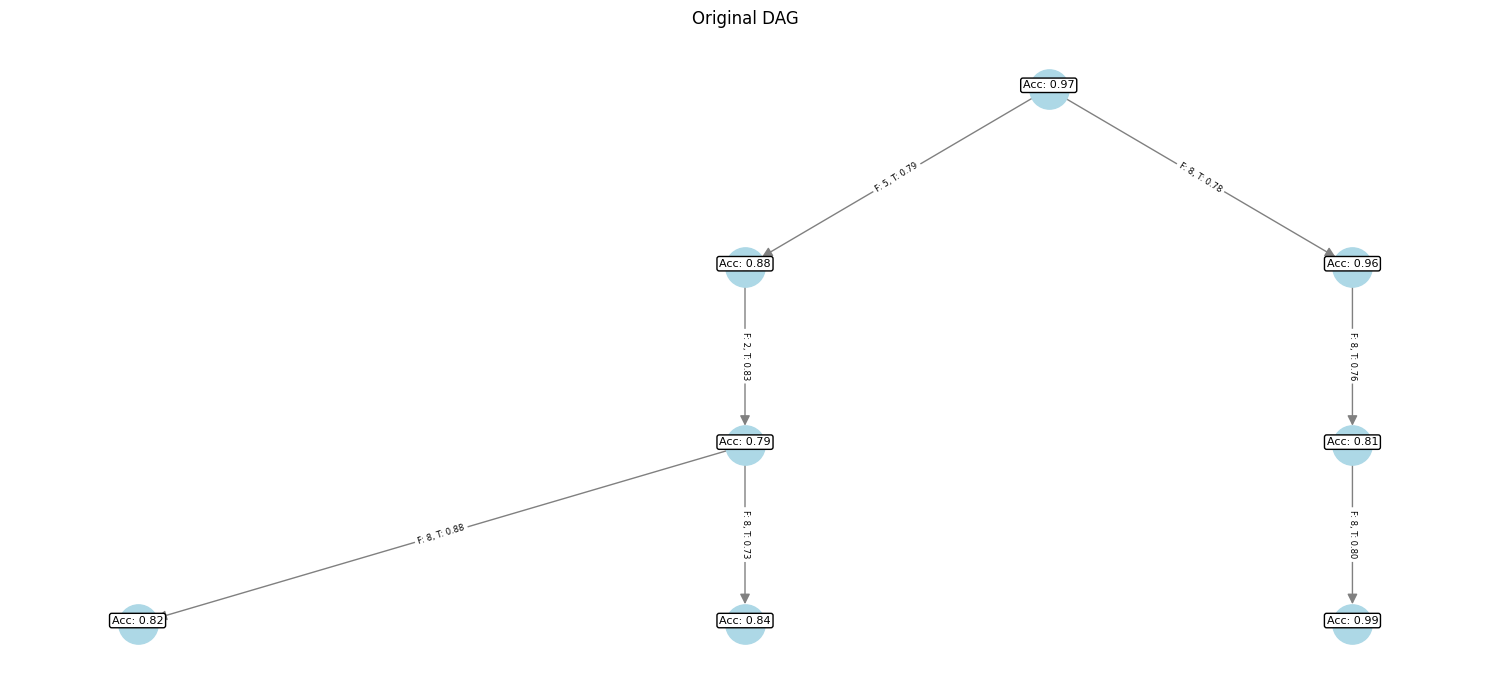

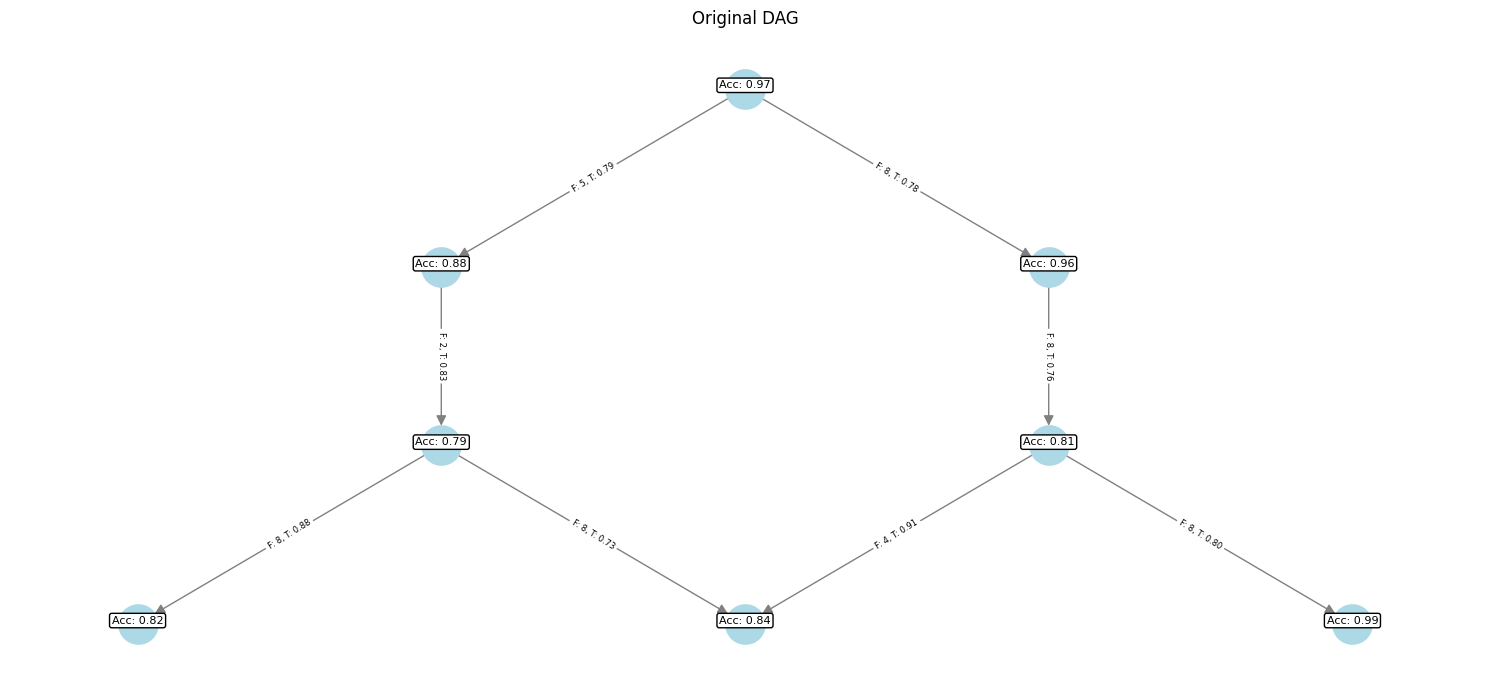

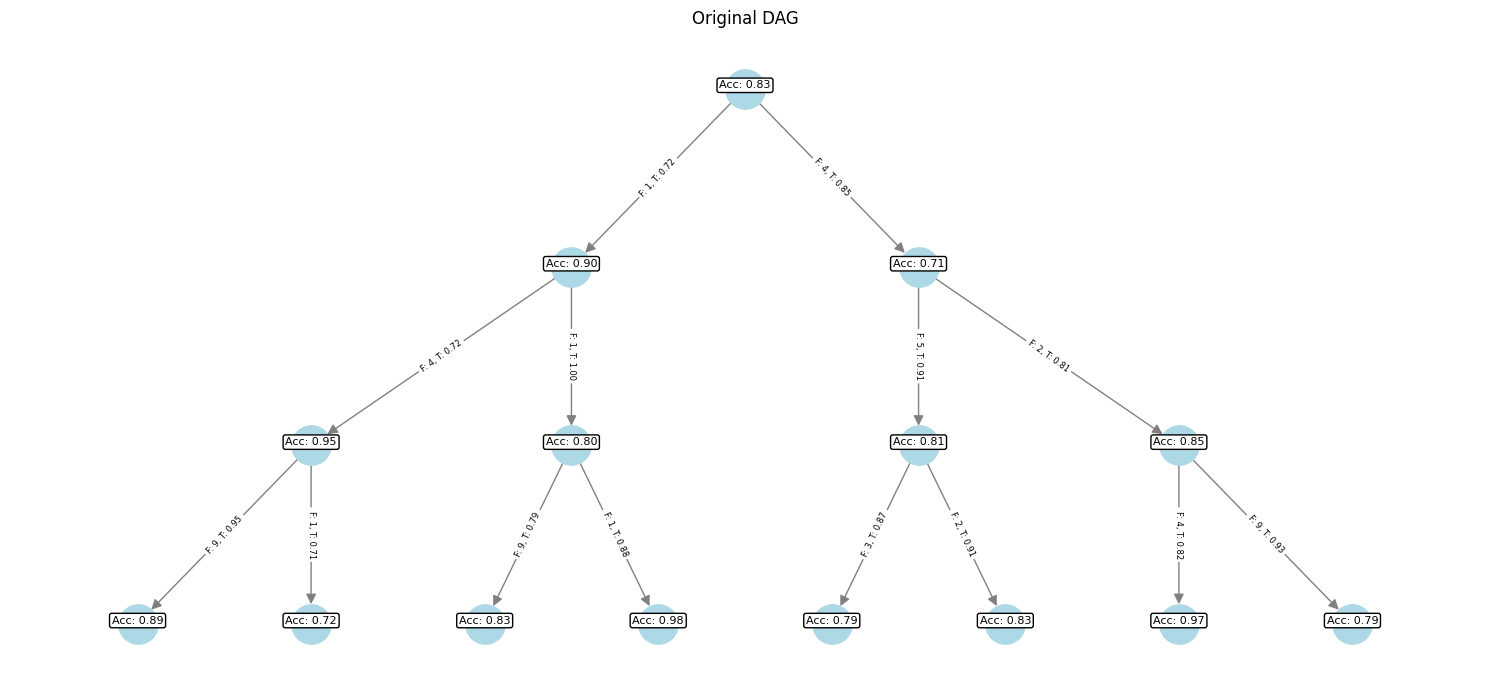

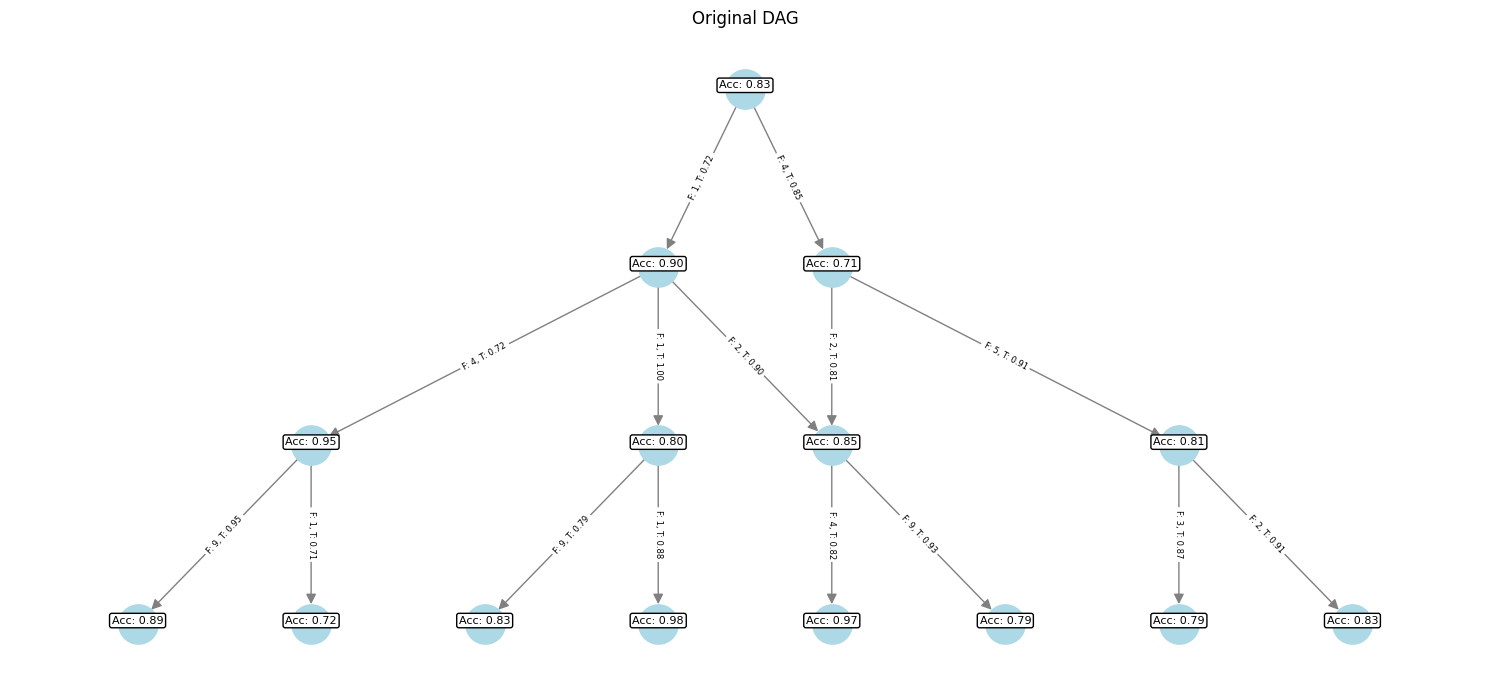

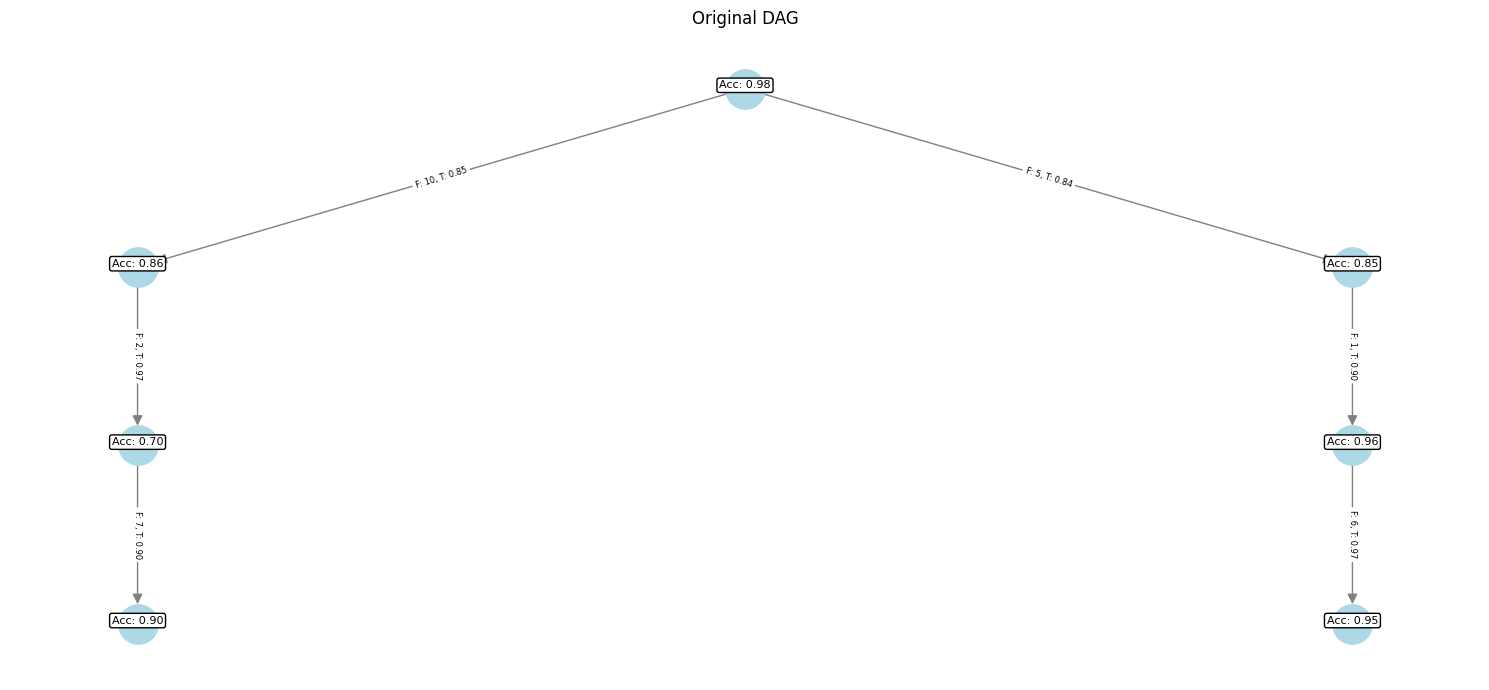

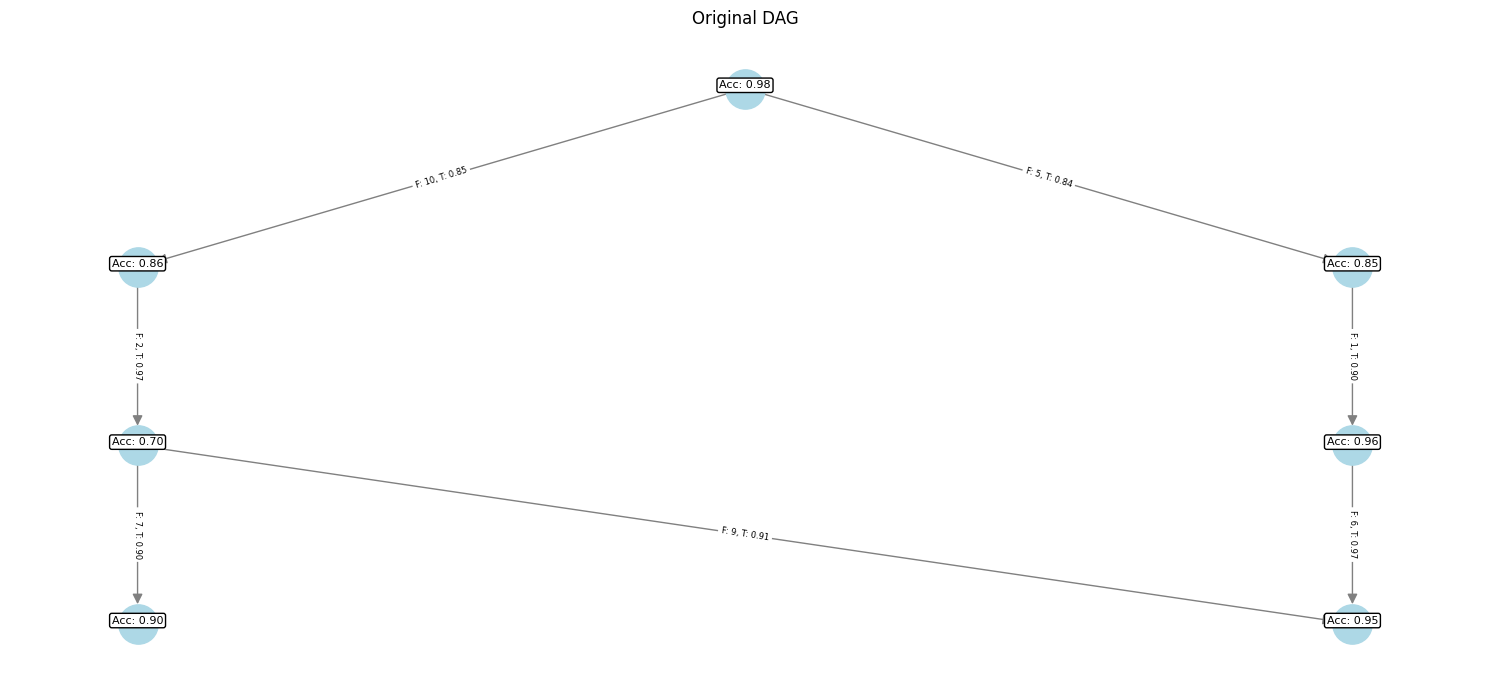

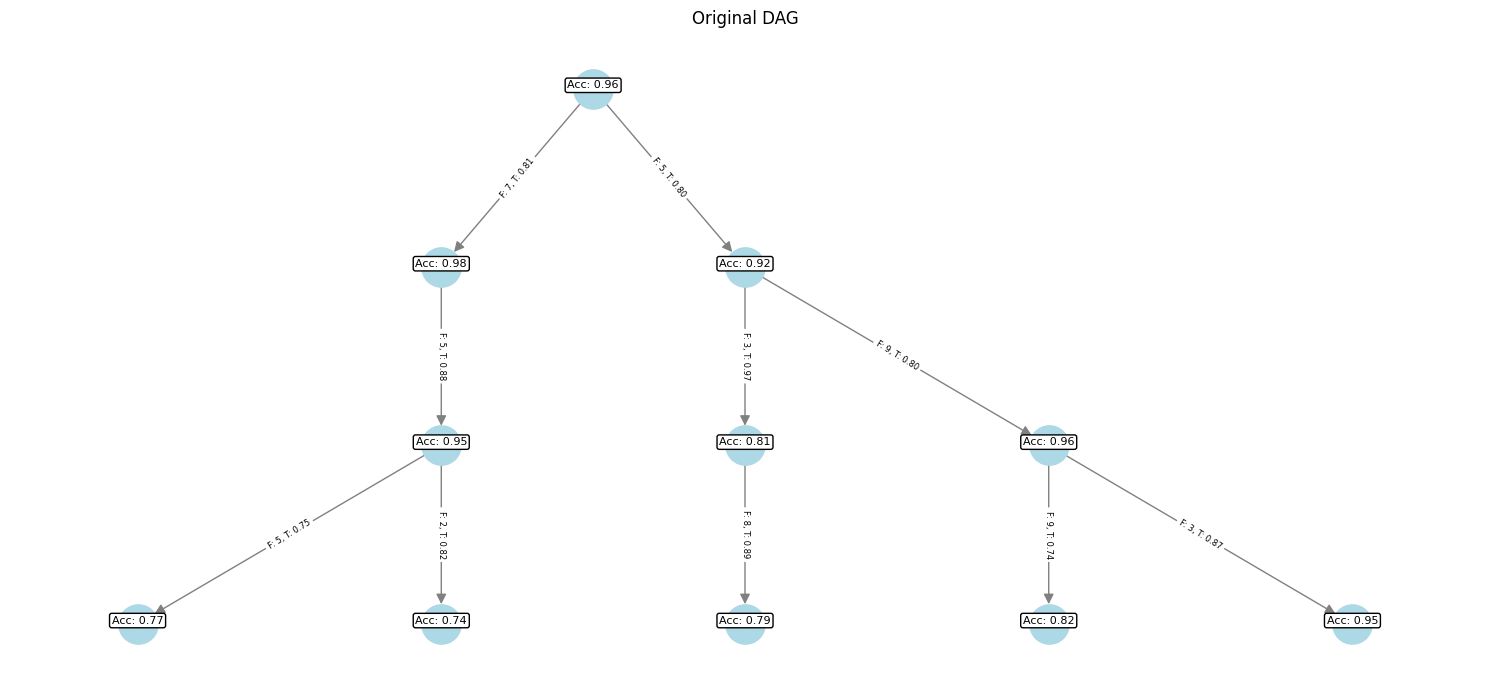

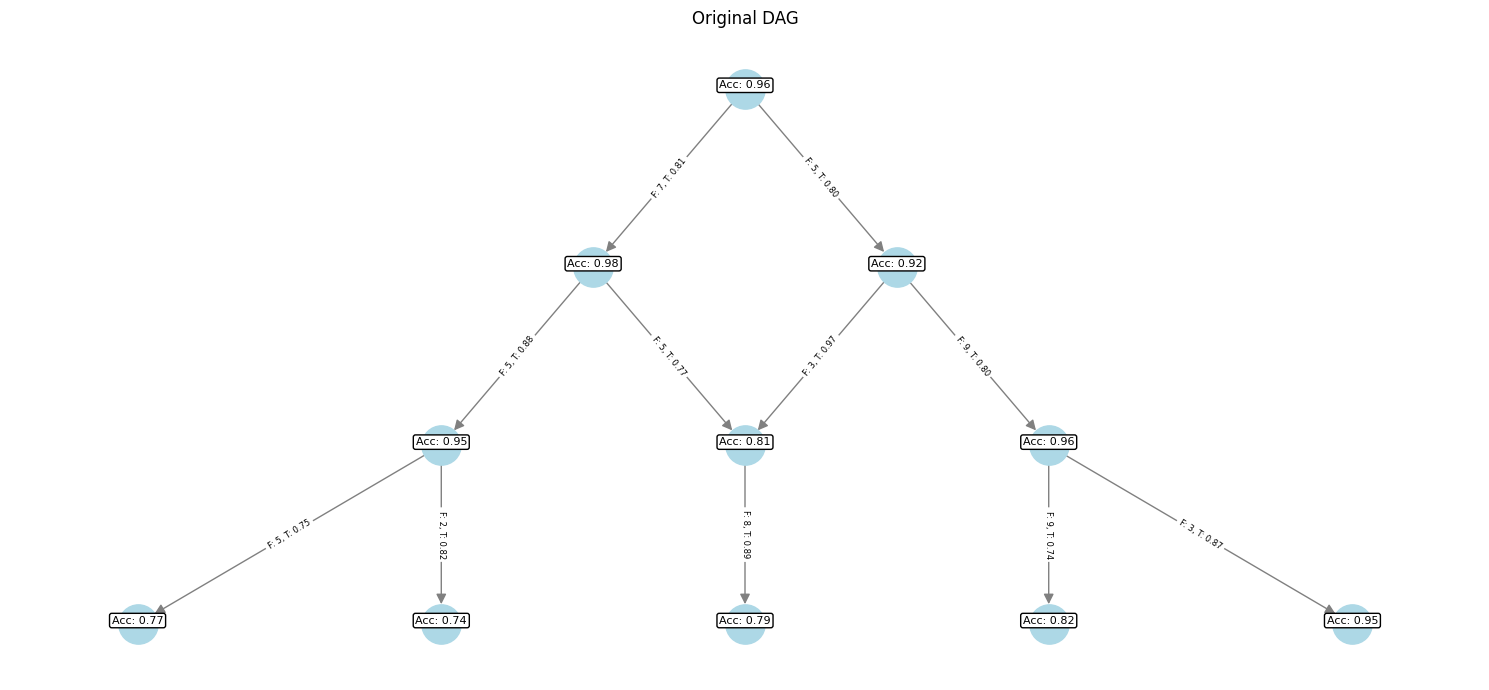

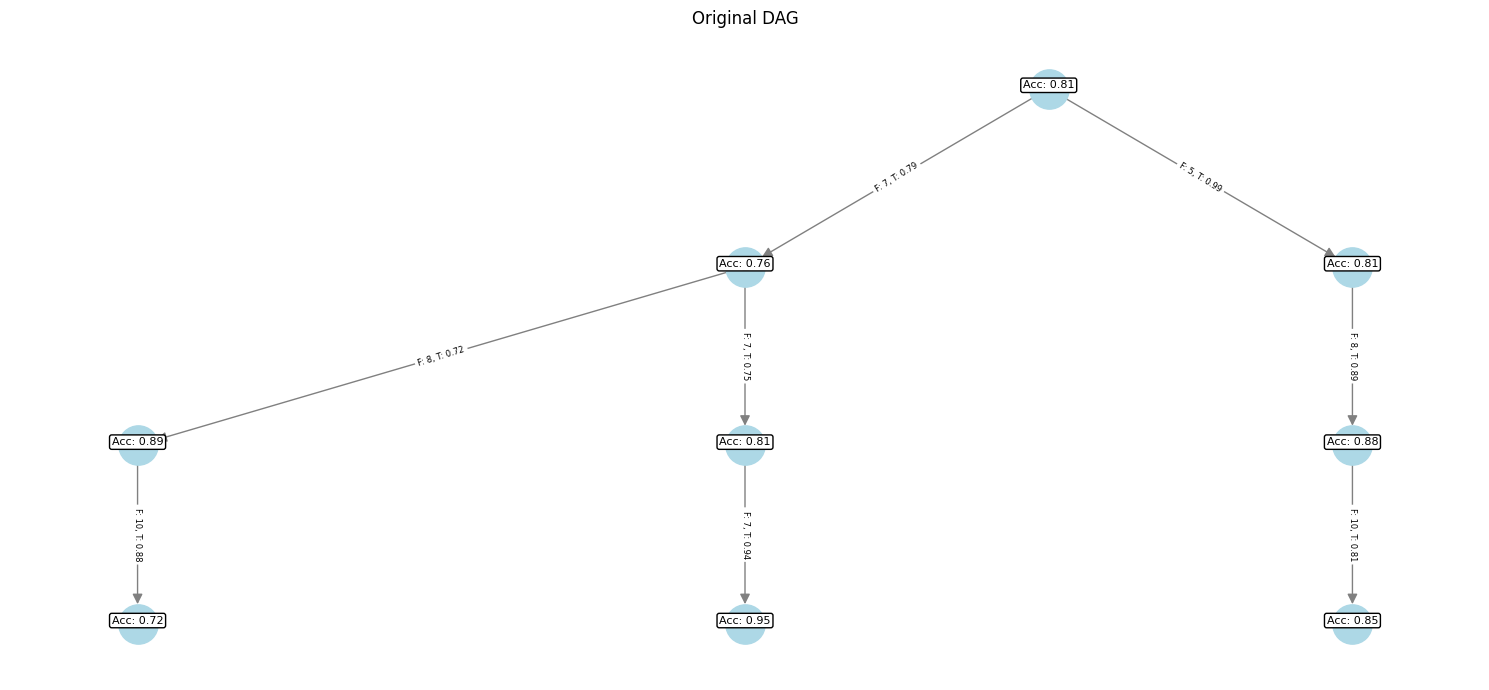

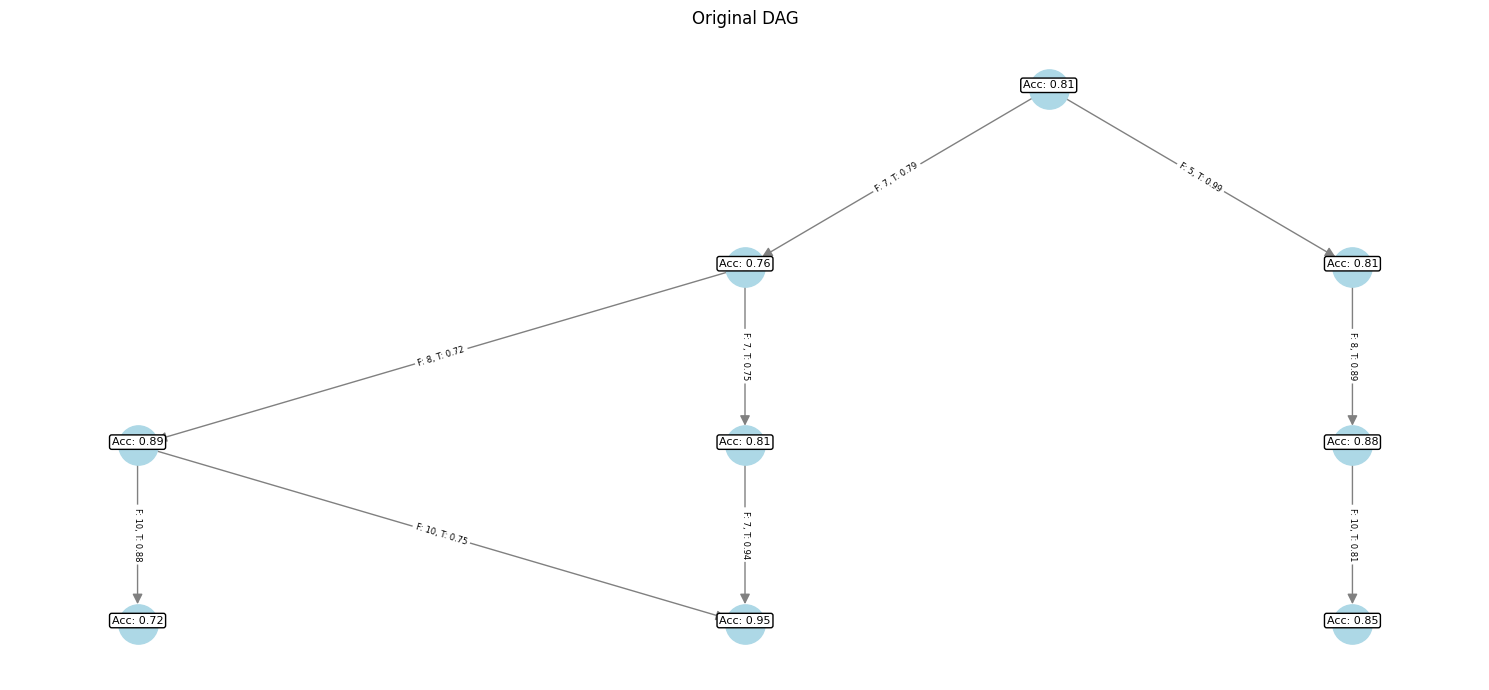

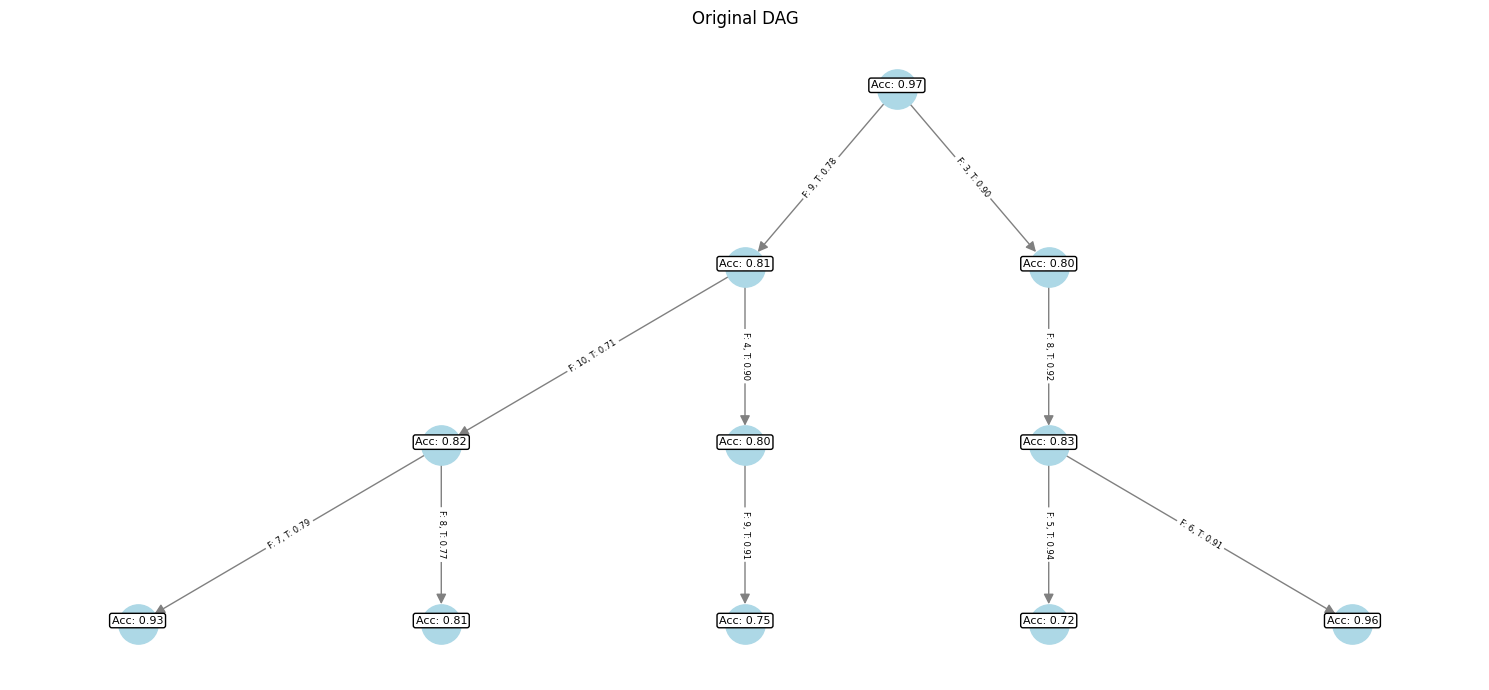

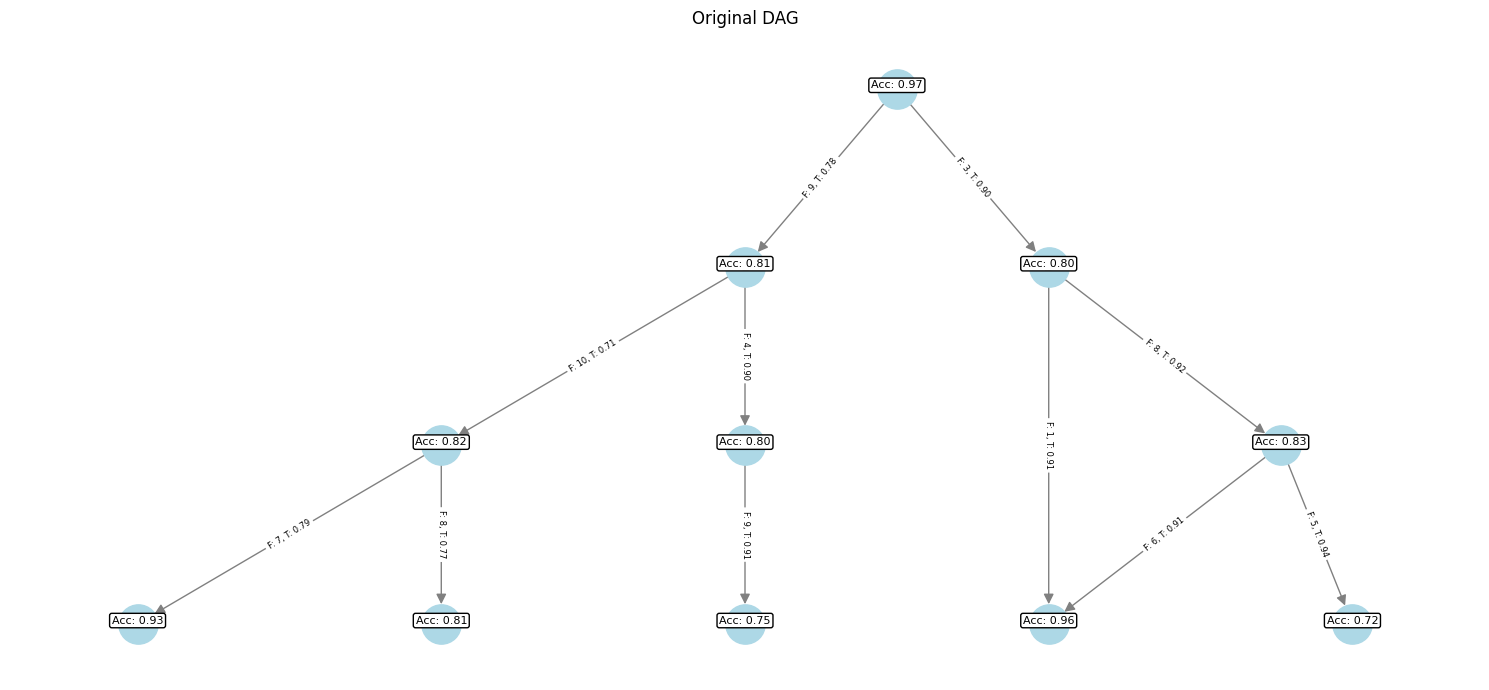

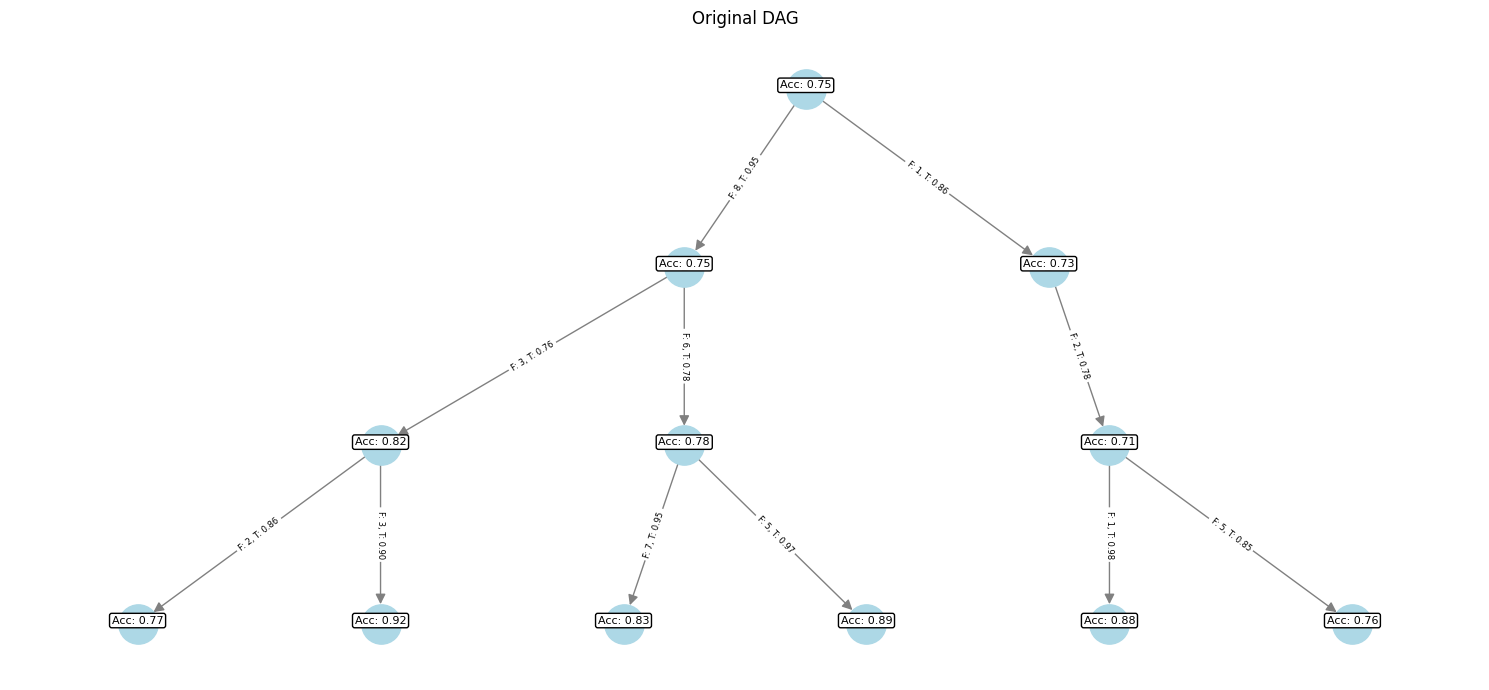

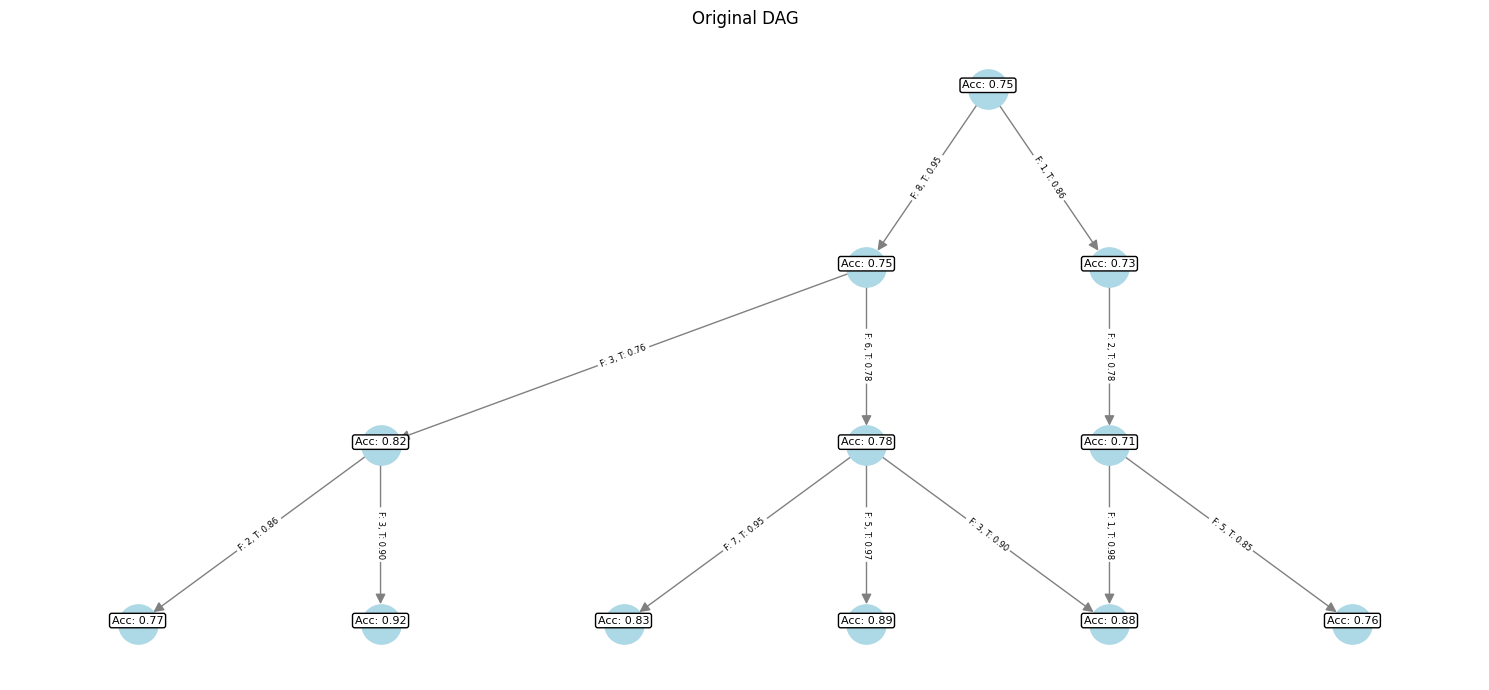

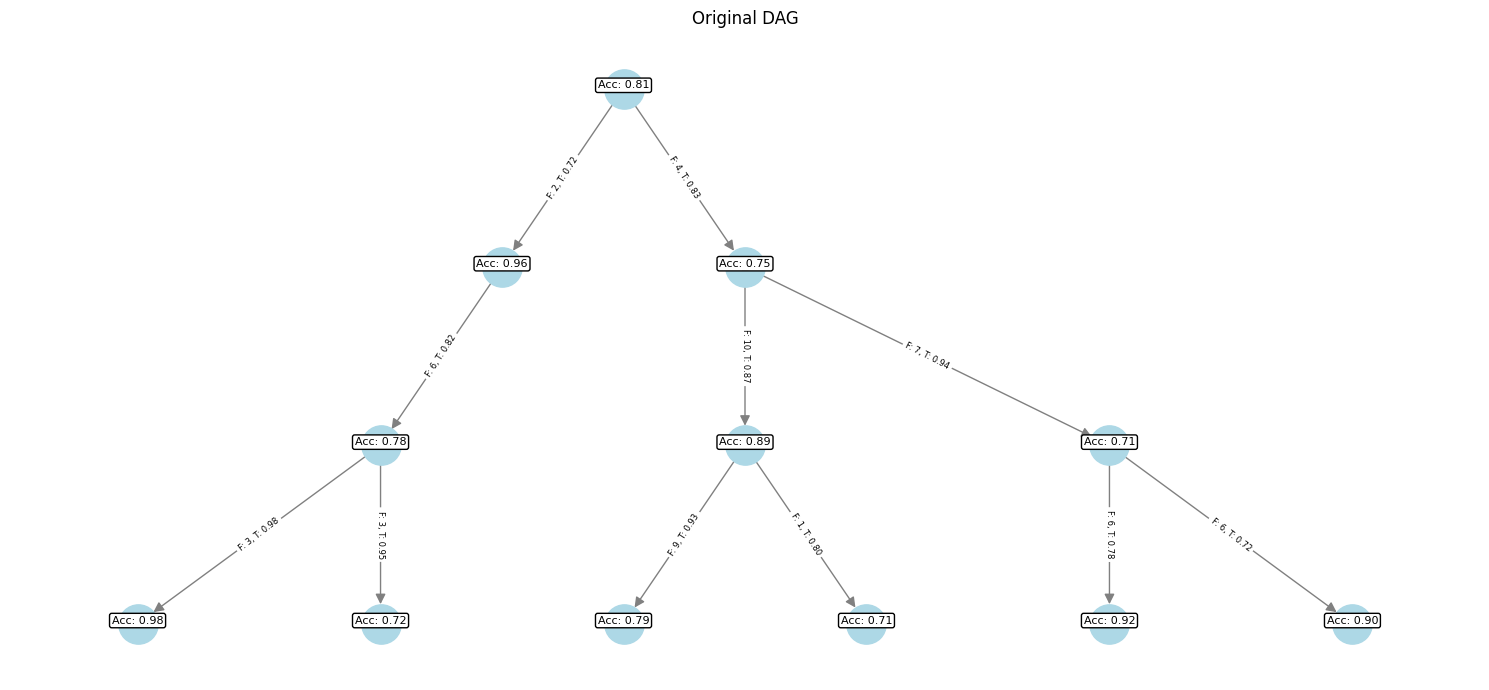

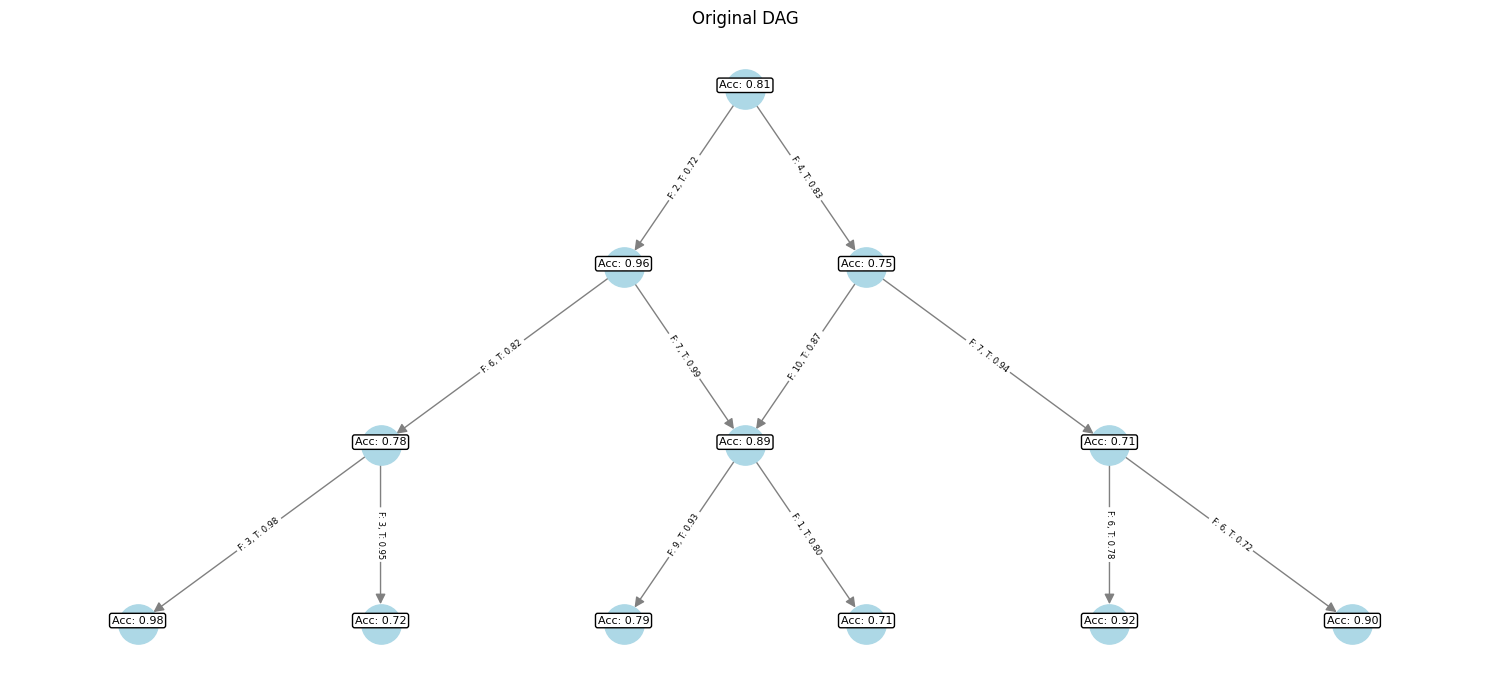

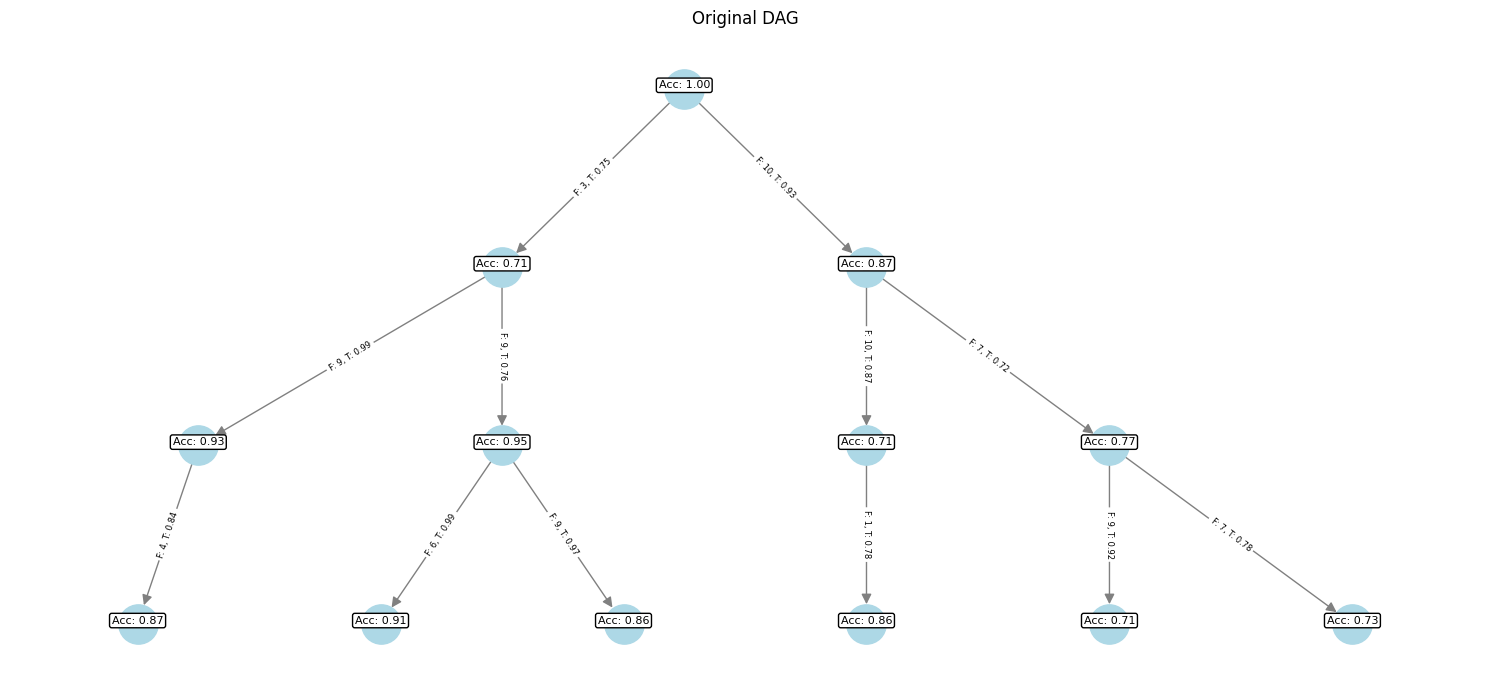

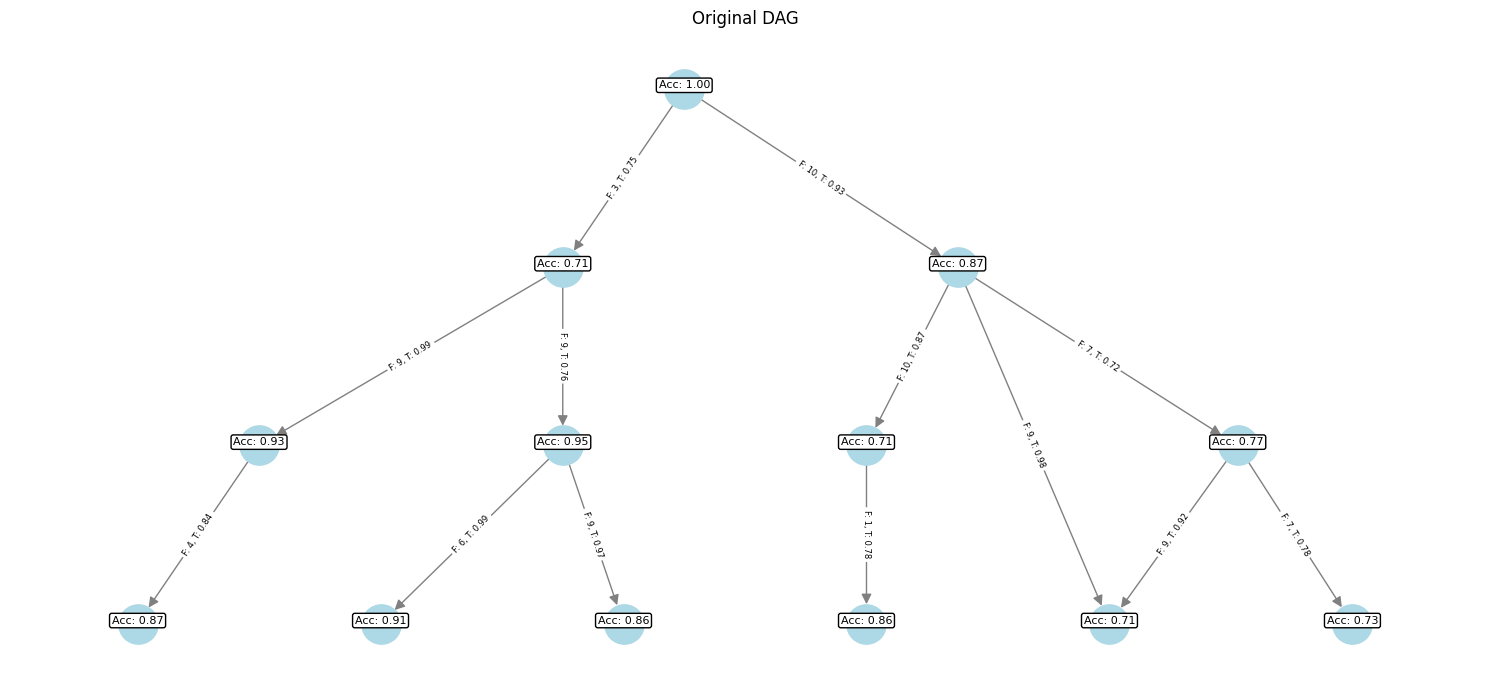

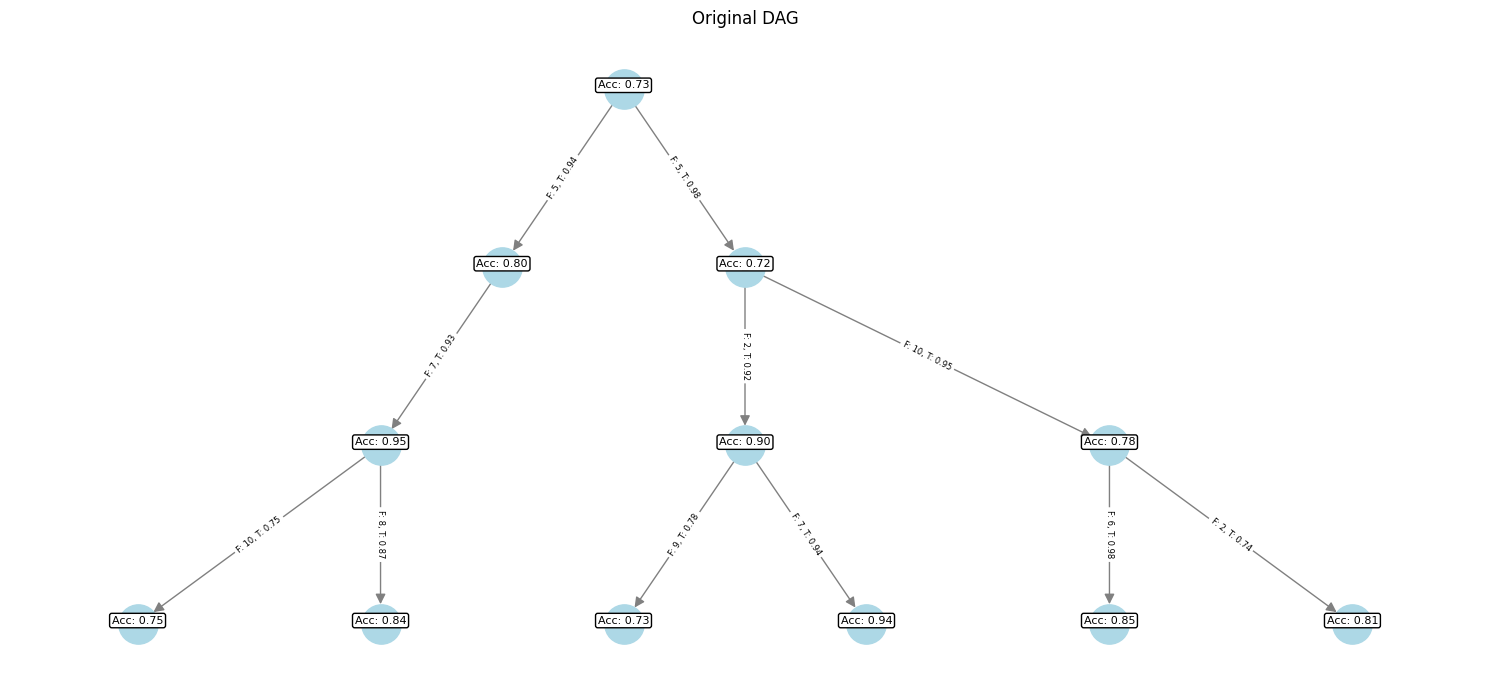

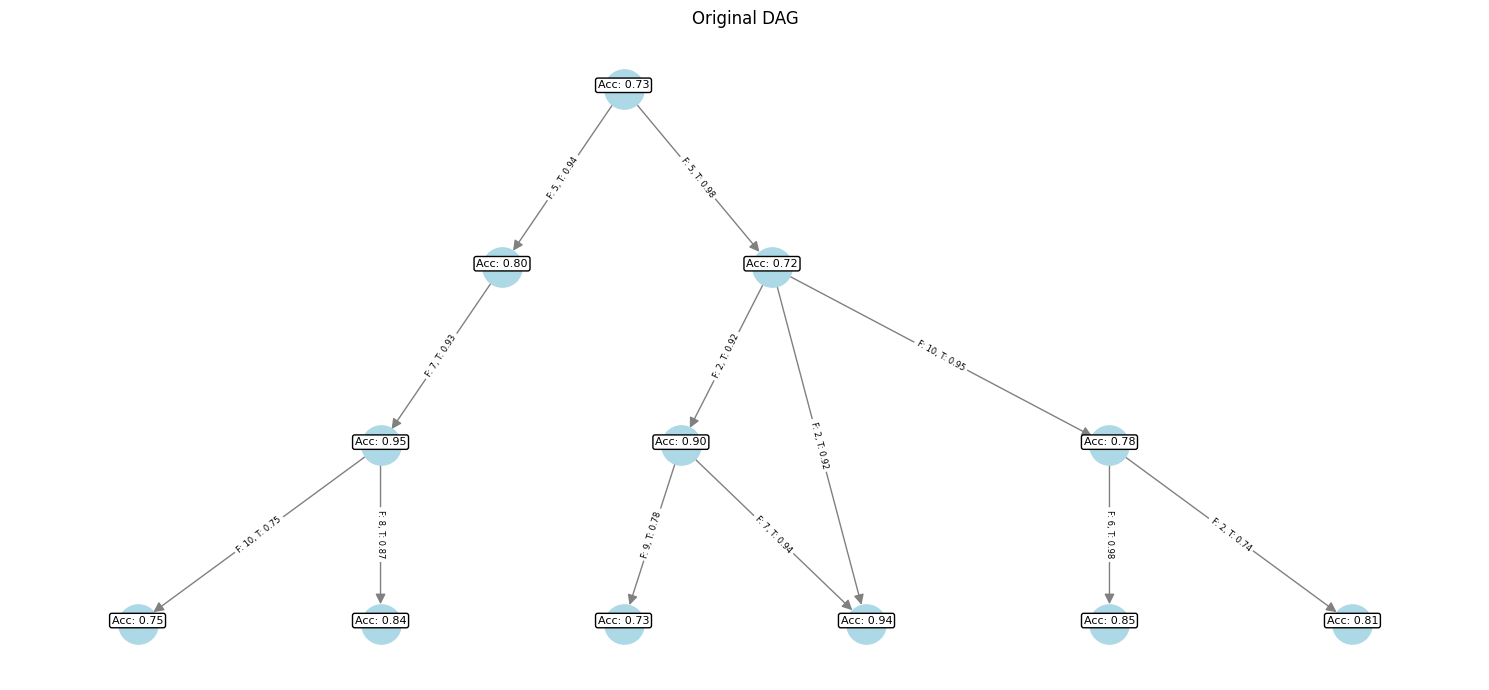

In [53]:
#####
#
#   NOTE: If this step fails, you may have not done the above connect
#   to Google Drive REQUIRED step. Alternatively, you may not have the folder
#   in your Google Drive. You can click on the folder icon in the sidebar to
#   see the colab Files, and you should see a folder "drive" if you connected.
#   You can expand MyDrive and you should either see or create a folder
#   "GraphDataSet" and then in that folder, create another folder to hold your
#   generated graphs.
#
#   Please COPY the for-loop instaed of editing an existing for-loop to
#   create a new set of graphs in a new folder, e.g., maybe you want depth 7
#   graphs, so create a folder DepthSevenGraphs and copy the for-loop to create
#   those graphs instead of editing one of the existing for-loops.
#
#####

# filename = f"/content/drive/MyDrive/GraphDataSet/my_graph_0"
# process_network_graph(filename, 4, 2, True)

# for i in range(1000):
#   filename = f"/content/drive/MyDrive/ML_data/my_graph_{i}"
#   process_network_graph(filename, graph_depth=4)

for i in range(10):
  filename = f"/content/drive/MyDrive/GraphDataSet/DepthFourGraphs/my_graph_{i}"
  process_network_graph(filename, graph_depth=4, visualize_output=True)

# for i in range(1000):
#   filename = f"/content/drive/MyDrive/GraphDataSet/DepthSixGraphs/my_graph_{i}"
#   process_network_graph(filename, graph_depth=6)

# for i in range(1000):
#   filename = f"/content/drive/MyDrive/GraphDataSet/TripleExtraLine/my_graph_{i}"
#   process_network_graph(filename, 6, 3)

# for i in range(1000):
#   filename = f"/content/drive/MyDrive/GraphDataSet/DepthFourExtraLines/my_graph_{i}"
#   process_network_graph(filename, 4, 3)

# for i in range(1000):
#   filename = f"/content/drive/MyDrive/GraphDataSet/DepthEightGraphs/my_graph_{i}"
#   process_network_graph(filename, graph_depth=8)

# for i in range(1000):
#   filename = f"/content/drive/MyDrive/GraphDataSet/DepthEightGraphsThreeExtra/my_graph_{i}.graphml"
#   process_network_graph(filename, 8, 3)

# for i in range(1000):
#   filename = f"/content/drive/MyDrive/GraphDataSet/DepthEightGraphsFiveExtra/my_graph_{i}.graphml"
#   process_network_graph(filename, 8, 5)

# Machine Learning - Graph


## Install Dependencies

This code block took 42 minutes to run in our experience.

In [5]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-geometric


Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=495091 sha256=e0a9dbf6971231a756d968721ae9e25333145e450c697f9bc6590ba7be022f04
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1035675 sha256=151c923aeecd998f9b07eb9b9e90e6d8985002a28affad3ac289e5c3e7ba2aef
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built 

## Import libraries

In [7]:
import os
import networkx as nx
import torch
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from torch_geometric.nn import GCNConv
from torch_geometric.loader import DataLoader
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.nn import NNConv, global_mean_pool
from torch.nn import Sequential, Linear, ReLU


## Code

### Classes

In [8]:
class GCN(torch.nn.Module):
    # def __init__(self, num_node_features, num_classes):
    #     super(GCN, self).__init__()
    #     self.conv1 = GCNConv(num_node_features, 16)  # First GCN layer
    #     self.conv2 = GCNConv(16, num_classes)  # Second GCN layer

    def __init__(self, num_node_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)  # Update num_node_features
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        # Pool node features into a single graph-level feature
        x = global_mean_pool(x, batch)
        return F.log_softmax(x, dim=1)

class NNConvModel(torch.nn.Module):
    def __init__(self, num_node_features, num_edge_features, num_classes):
        super(NNConvModel, self).__init__()
        # Define NN for NNConv
        nn = Sequential(Linear(num_edge_features, 16), ReLU(), Linear(16, num_node_features * 16))
        self.conv1 = NNConv(num_node_features, 16, nn, aggr='mean')
        self.fc1 = Linear(16, num_classes)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr

        # Check if edge_attr is not None
        if edge_attr is None:
            raise ValueError("Edge attributes (edge_attr) are not provided in the data object")

        x = self.conv1(x, edge_index, edge_attr)
        x = F.relu(x)
        x = global_mean_pool(x, data.batch)
        x = self.fc1(x)

        return F.log_softmax(x, dim=1)

class EnhancedNNConvModel(torch.nn.Module):
    def __init__(self, num_node_features, num_edge_features, num_classes):
        super(EnhancedNNConvModel, self).__init__()
        # Define NN for NNConv with more complexity
        nn1 = Sequential(Linear(num_edge_features, 32), ReLU(), Linear(32, num_node_features * 32))
        nn2 = Sequential(Linear(num_edge_features, 32), ReLU(), Linear(32, 32 * 32))
        self.conv1 = NNConv(num_node_features, 32, nn1, aggr='mean')
        self.conv2 = NNConv(32, 32, nn2, aggr='mean')
        self.fc1 = Linear(32, num_classes)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = F.relu(self.conv1(x, edge_index, edge_attr))
        x = F.relu(self.conv2(x, edge_index, edge_attr))
        x = global_mean_pool(x, data.batch)
        x = self.fc1(x)
        return F.log_softmax(x, dim=1)


### Definitions

In [9]:

def graph_to_data_object(graph):
    # Create a mapping from node IDs to integers
    node_mapping = {node: i for i, node in enumerate(graph.nodes())}

    # # Convert node features to tensor
    # node_features = torch.tensor([graph.nodes[n]['accuracy'] for n in graph.nodes()], dtype=torch.float).view(-1, 1)

    # Assuming additional node feature 'feature_x'
    # node_features = torch.tensor([[graph.nodes[n]['accuracy'], graph.nodes[n]['feature_x']] for n in graph.nodes()], dtype=torch.float)
    node_features = torch.tensor([[graph.nodes[n]['accuracy']] for n in graph.nodes()], dtype=torch.float)
    # Edge features, if applicable
    edge_features = torch.tensor([[graph[u][v]['frequency'], graph[u][v]['trust']] for u, v in graph.edges()], dtype=torch.float)

    # Prepare edge indices with integer mapping
    edge_list = list(graph.edges())
    edge_index = torch.tensor([[node_mapping[u], node_mapping[v]] for u, v in edge_list], dtype=torch.long).t().contiguous()

    # Extract label
    y = torch.tensor([int(graph.graph['paradox'])], dtype=torch.float)

    # data = Data(x=node_features, edge_index=edge_index, y=y)
    data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_features, y=y)
    return data



def load_graphs(path, num_graphs=100):
    graphs = []
    labels = []  # List to store labels
    for i in range(num_graphs):
        graph = nx.read_graphml(f'{path}/my_graph_{i}.graphml')
        data = graph_to_data_object(graph)
        graphs.append(data)
        labels.append(int(graph.graph['paradox']))  # Extract and store labels
    return graphs, labels


def train(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y.long())  # data.y is now the same size as out
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, loader, device):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.max(dim=1)[1]
        correct += pred.eq(data.y.view(-1).long()).sum().item()
    return correct / len(loader.dataset)


def execute_model_training_and_testing(path, learning_rate=0.01, random_state=42):
    # Load graphs and labels
    graphs, labels = load_graphs(path, 1000)

    # Split dataset
    train_graphs, test_graphs, train_labels, test_labels = train_test_split(graphs, labels, test_size=0.2, random_state=random_state)

    # Initialize model, define loss function and optimizer
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = EnhancedNNConvModel(num_node_features=1, num_edge_features=2, num_classes=2).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = torch.nn.CrossEntropyLoss()

    # Training and evaluation
    train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_graphs, batch_size=32, shuffle=False)

    # Training process
    for epoch in range(100):  # Number of epochs
        loss = train(model, train_loader, optimizer, criterion, device)
        train_acc = evaluate(model, train_loader, device)
        test_acc = evaluate(model, test_loader, device)
        print(f'Epoch: {epoch}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')


### Execution

Leave only one path uncommented, the path matching the data set that you wish to train on. If you created a new folder & dataset, add a new path variable with that path.

In [13]:
#####
#
#   NOTE: If this step fails, you may have not done the above connect
#   to Google Drive REQUIRED step (Approach 2, Execution). Alternatively, you
#   may not have the folder in your Google Drive. You can click on the folder
#   icon in the sidebar to
#   see the colab Files, and you should see a folder "drive" if you connected.
#   You can expand MyDrive and you should either see or create a folder
#   "GraphDataSet" and then in that folder, create another folder to hold your
#   generated graphs.
#
#   Please COPY the "path" variable instead of editing an existing variable.
#
#####
# path = '/content/drive/MyDrive/ML_data/'

# path = '/content/drive/MyDrive/GraphDataSet/DepthFourGraphs/'
# path = '/content/drive/MyDrive/GraphDataSet/DepthFourExtraLines/'
# path = '/content/drive/MyDrive/GraphDataSet/DepthSixGraphs/'
# path = '/content/drive/MyDrive/GraphDataSet/TripleExtraLine/'
# path = '/content/drive/MyDrive/GraphDataSet/DepthEightGraphs/'
# path = '/content/drive/MyDrive/GraphDataSet/DepthEightGraphsThreeExtra/'
path = '/content/drive/MyDrive/GraphDataSet/DepthEightGraphsFiveExtra/'

execute_model_training_and_testing(path, .01, random_state=42)

Epoch: 0, Loss: 0.7124, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 1, Loss: 0.5747, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 2, Loss: 0.5793, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 3, Loss: 0.5694, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 4, Loss: 0.5714, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 5, Loss: 0.5764, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 6, Loss: 0.5673, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 7, Loss: 0.5682, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 8, Loss: 0.5687, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 9, Loss: 0.5676, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 10, Loss: 0.5694, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 11, Loss: 0.5678, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 12, Loss: 0.5680, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 13, Loss: 0.5673, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 14, Loss: 0.5680, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 15, Loss: 0.5677, Train Acc: 0.7450, Test Acc: 0.7500
Epoch: 16, Loss: 0.5672, Train Acc

# Machine Learning - Traditional

## Install Dependencies

No new dependencies for this section.

## Import Libraries

In [26]:
import os
import networkx as nx
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Code

### Classes

No new classes for this section.

### Definitions

In [27]:

def extract_features_from_files(path):
    graph_properties = []

    # Loop through all files in the provided directory
    for filename in os.listdir(path):
        if filename.endswith('.graphml'):  # Ensure we are reading only GraphML files
            file_path = os.path.join(path, filename)
            graph = nx.read_graphml(file_path)

            # Extract graph-level properties
            depth = graph.graph.get('depth', 0)
            mean_trust = graph.graph.get('mean_trust', 0)
            mean_reliability = graph.graph.get('mean_reliability', 0)
            node_count = len(graph.nodes)
            edge_count = len(graph.edges)
            mean_node_degree = sum(dict(graph.degree()).values()) / node_count if node_count > 0 else 0

            # Append extracted features to the list
            graph_properties.append({
                'depth': depth,
                'mean_trust': mean_trust,
                'mean_reliability': mean_reliability,
                'node_count': node_count,
                'edge_count': edge_count,
                'mean_node_degree': mean_node_degree,
                'paradox': graph.graph.get('paradox', False)
            })

    return pd.DataFrame(graph_properties)

def train_model(X_train, y_train, n_estimators=100, random_state=42):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)

    # Extract feature importances
    feature_importances = model.feature_importances_
    return model, feature_importances

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy


def process_and_evaluate_graphs(graphs, test_size=0.2, random_state=42):
    # Extract features from graph files
    graph_data_df = extract_features_from_files(graphs)

    # Split data into features and target
    X = graph_data_df.drop('paradox', axis=1)
    y = graph_data_df['paradox'].astype(int)  # Ensure target is an integer for classification

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the model and get feature importances
    model, feature_importances = train_model(X_train, y_train, random_state=random_state)

    # Evaluate the model
    accuracy = evaluate_model(model, X_test, y_test)

    # Print feature importances
    feature_names = X_train.columns
    for name, importance in zip(feature_names, feature_importances):
        print(f"{name}: {importance}")

    return model, accuracy, feature_importances


### Execution


In [29]:

for file_path in [
  #  '/content/drive/MyDrive/GraphDataSet/DepthFourGraphs',
  #  '/content/drive/MyDrive/GraphDataSet/DepthFourExtraLines' ,
  #  '/content/drive/MyDrive/GraphDataSet/DepthSixGraphs' ,
  #  '/content/drive/MyDrive/GraphDataSet/TripleExtraLine',
   '/content/drive/MyDrive/GraphDataSet/DepthEightGraphs/',
   '/content/drive/MyDrive/GraphDataSet/DepthEightGraphsThreeExtra/',
   '/content/drive/MyDrive/GraphDataSet/DepthEightGraphsFiveExtra/'
   ]:
   rf_model, accuracy, feature_importances = process_and_evaluate_graphs(file_path)
   print(f"Model Accuracy: {accuracy}\n\n")

# rf_model, accuracy = process_and_evaluate_graphs('/content/drive/MyDrive/ML_data')
# print(f"Model Accuracy: {accuracy}")


depth: 0.0
mean_trust: 0.6210458240579911
mean_reliability: 0.0
node_count: 0.1927879866228131
edge_count: 0.18616618931919582
mean_node_degree: 0.0
Model Accuracy: 0.7


depth: 0.0
mean_trust: 0.6146573861552722
mean_reliability: 0.0
node_count: 0.18827132887767734
edge_count: 0.1970712849670505
mean_node_degree: 0.0
Model Accuracy: 0.705


depth: 0.0
mean_trust: 0.6210184272723506
mean_reliability: 0.0
node_count: 0.19422722250491709
edge_count: 0.18475435022273234
mean_node_degree: 0.0
Model Accuracy: 0.64


